In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.io as sio
from pathlib import Path
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [64]:
matplotlib.rcParams.update({'font.size': 20})

In [65]:
model_dir = Path("./models/")
result_dir = Path("./result/")
fig_dir = Path("./paper/")
if not fig_dir.exists():
    fig_dir.mkdir()

In [66]:
def plot_model(model, fig_name, fig_dir, src=False, vmax=None, vmin=None, cmap="jet"):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    plt.figure(figsize=(12,8))
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, model['vp'].T/1e3, vmax=vmax, vmin=vmin, rasterized=True, shading='auto', cmap=cmap)
    if src:
        plt.plot(x[receiver[0][0]][0]/1e3-x0, y[receiver[0][1]][0]/1e3, color="w", linewidth=4)
        for i in range(len(source)):
            plt.plot(x[source[i][0][0][0]]/1e3-x0, y[source[i][0][0][1]]/1e3, 'r*', markersize=18, alpha=0.8)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.3)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s', fontsize=18)
    plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight')
    plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight')
    plt.show()

In [67]:
def plot_result(result, model, fig_name, fig_dir, src=False, vmax=None, vmin=None, cmap="jet"):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    
    idx = np.arange(0, model['nx'][0][0], int(np.floor(model['nx'][0][0]/5)))[1:-1]

    plt.figure(figsize=(12,8))
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result/1e3, vmax=vmax, vmin=vmin, rasterized=True, shading='auto', cmap=cmap)
    if src:
        plt.plot(x[receiver[0][0]][0]/1e3-x0, y[receiver[0][1]][0]/1e3, color="w", linewidth=4)
        for i in range(len(source)):
            plt.plot(x[source[i][0][0][0]]/1e3-x0, y[source[i][0][0][1]]/1e3, 'r*', markersize=18, alpha=0.8)
    
    for i in range(len(idx)):
        plt.plot([x[idx[i]]/1e3, x[idx[i]]/1e3], [y[0]/1e3, y[-1]/1e3], "k")
    
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.3)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s', fontsize=18)
    plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight')
    plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight')
    
    ## slice
    plt.figure(figsize=(10,4))
    for i in range(len(idx)):
        plt.subplot(1,len(idx),i+1)
        plt.plot(model["vp"][idx[i],:]/1e3, y/1e3, label="True")
        plt.plot(result.T[idx[i],:]/1e3, y/1e3, label=fig_name.split("/")[-1].split("_")[0])
        
        if i >= 1:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel("Z (km)")
        if i == len(idx)-1:
            plt.legend(fontsize="x-small")
        plt.gca().invert_yaxis()
        plt.autoscale(enable=True, axis='y', tight=True)

    plt.gcf().text(0.5, -0., 'Velocity (km/s)', ha='center', va="top")
    
    plt.show()

In [68]:
def plot_std(std, vp, model, fig_name, fig_dir, src=False, vmax=None, vmin=None, cmap="jet"):
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    x_mesh, y_mesh = np.meshgrid(x, y)
    x0 = x[0]/1e3
    plt.figure(figsize=(12,8))
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/1e3, rasterized=True, shading='auto', cmap=cmap)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.3)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('km/s', fontsize=14)
    plt.savefig(fig_dir.joinpath(fig_name+"_std.png"), bbox_inches='tight')
    plt.savefig(fig_dir.joinpath(fig_name+"_std.pdf"), bbox_inches='tight')

    plt.figure(figsize=(12,8))
    # plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/(np.abs(vp - model["vp"].T) + 1) * 100, rasterized=True)
    im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, std/np.abs(vp) * 100, rasterized=True, shading='auto', cmap=cmap)
    plt.xlabel("X (km)")
    plt.ylabel("Z (km)")
    plt.gca().invert_yaxis()
    plt.axis('scaled')
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes("right", size="2%", pad=0.3)
    cb = plt.colorbar(im, cax)
    cb.ax.set_title('%', fontsize=14)
    plt.savefig(fig_dir.joinpath(fig_name+"_std100.png"), bbox_inches='tight')
    plt.savefig(fig_dir.joinpath(fig_name+"_std100.pdf"), bbox_inches='tight')
    plt.show()

In [69]:
def plot_slice(subdirs, model, names=None,  src=False, vmax=None, vmin=None, cmap="jet"):
    
    fnames = []
    results = []
    for subdir in subdirs:
        fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
        loss = np.loadtxt(fname, delimiter=",")
        fname = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[len(loss)//10-1]
        fnames.append(fname)
        results.append(np.loadtxt(fname))
    
    x = np.arange(model['nx'][0][0]) * model['dx'][0][0]
    y = np.arange(model['ny'][0][0]) * model['dy'][0][0]
    
    idx = np.arange(0, model['nx'][0][0], int(np.floor(model['nx'][0][0]/5)))[1:-1]

#     plt.figure(figsize=(12,8))
#     x_mesh, y_mesh = np.meshgrid(x, y)
#     x0 = x[0]/1e3
#     im = plt.pcolormesh(x_mesh/1e3-x0, y_mesh/1e3, result/1e3, vmax=vmax, vmin=vmin, rasterized=True, shading='auto', cmap=cmap)
#     if src:
#         plt.plot(x[receiver[0][0]][0]/1e3-x0, y[receiver[0][1]][0]/1e3, color="w", linewidth=4)
#         for i in range(len(source)):
#             plt.plot(x[source[i][0][0][0]]/1e3-x0, y[source[i][0][0][1]]/1e3, 'r*', markersize=18, alpha=0.8)
    
#     for i in range(len(idx)):
#         plt.plot([x[idx[i]]/1e3, x[idx[i]]/1e3], [y[0]/1e3, y[-1]/1e3], "k")
    
#     plt.xlabel("X (km)")
#     plt.ylabel("Z (km)")
#     plt.gca().invert_yaxis()
#     plt.axis('scaled')
#     divider = make_axes_locatable(plt.gca())
#     cax = divider.append_axes("right", size="2%", pad=0.3)
#     cb = plt.colorbar(im, cax)
#     cb.ax.set_title('km/s', fontsize=18)
#     plt.savefig(fig_dir.joinpath(fig_name+".png"), bbox_inches='tight')
#     plt.savefig(fig_dir.joinpath(fig_name+".pdf"), bbox_inches='tight')
    
    ## slice
    linestyles = ["-.", "--", ":"]
    plt.figure(figsize=(8,4))
    for i in range(len(idx)):
        plt.subplot(1,len(idx),i+1)
        plt.plot(model["vp"][idx[i],:]/1e3, y/1e3, label="True")
        for j in range(len(subdirs)):
            if names is None:
                plt.plot(results[j].T[idx[i],:]/1e3, y/1e3, label=subdirs[j].split("/")[0], linestyle=linestyles[j])
            else:
                plt.plot(results[j].T[idx[i],:]/1e3, y/1e3, label=name[j], linestyle=linestyles[j])
        
        if i >= 1:
            plt.gca().set_yticklabels([])
        else:
            plt.ylabel("Z (km)")
        if i == len(idx)-1:
            plt.legend(fontsize="xx-small")
        plt.gca().invert_yaxis()
        plt.autoscale(enable=True, axis='y', tight=True)

    plt.gcf().text(0.5, -0., 'Velocity (km/s)', ha='center', va="top")
    
    plt.show()

In [70]:
def plot_subdir(subdir, model_true, cmap="jet"):
    fname = sorted(result_dir.joinpath(subdir).glob("loss*txt"))[-1]
    loss = np.loadtxt(fname, delimiter=",")
    plt.figure()
    plt.semilogy(loss[:,0], loss[:,1])

    fname = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[len(loss)//10-1]
    print(f"loading {len(loss)//10} {fname}")
    inv_result = np.loadtxt(fname)
    plot_result(inv_result, model_true, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin, cmap=cmap)
#     plot_slice(inv_result, model_true, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin, cmap=cmap)
    return inv_result

In [71]:
def MSE(x, y):
    mse = np.sqrt(np.mean((x - y)**2))
    print(f"MSE = {mse}")
    return mse

def SSIM(x, y):
    k1 = 0.01
    k2 = 0.03
    vmax = np.max(x)
    vmin = np.min(x)
    μx = np.mean(x)
    μy = np.mean(y)
    σx = np.sqrt(np.mean((x-μx)**2))
    σy = np.sqrt(np.mean((y-μy)**2))
    σxy = np.mean((x-μx)*(y-μy))
    c1 = ( k1 * (vmax-vmin) )**2
    c2 = ( k2 * (vmax-vmin) )**2
    ssim = (2*μx*μy + c1) * (2*σxy + c2) / ((μx**2 + μy**2 + c1) * (σx**2 + σy**2 + c2))
#     print((2*μx*μy + c1), (μx**2 + μy**2 + c1),(2*σxy + c2), (σx**2 + σy**2 + c2))
    print(f"SSIM = {ssim}")
    return ssim

def PSNR(x, y):
    mse = np.sqrt(np.mean((x - y)**2))
    vmax = np.max(x)
    vmin = np.min(x)
    maxI = vmax - vmin
    psnr = 20.0 * np.log10(maxI) - 10.0 * np.log10(mse)
    print(f"PSNR = {psnr}")
    return psnr

def metrics(x, y):
    mse = MSE(x, y)
    ssim = SSIM(x, y)
    psnr = PSNR(x, y)

In [72]:
model_true_BP = sio.loadmat(model_dir.joinpath("BP-model-true.mat"))
model_smooth_BP = sio.loadmat(model_dir.joinpath("BP-model-smooth.mat"))

In [73]:
receiver = model_true_BP['receiver'][0][0][0]
source = model_true_BP['source'][0]
vmax = np.max(model_true_BP['vp'])/1e3
vmin = np.min(model_true_BP['vp'])/1e3

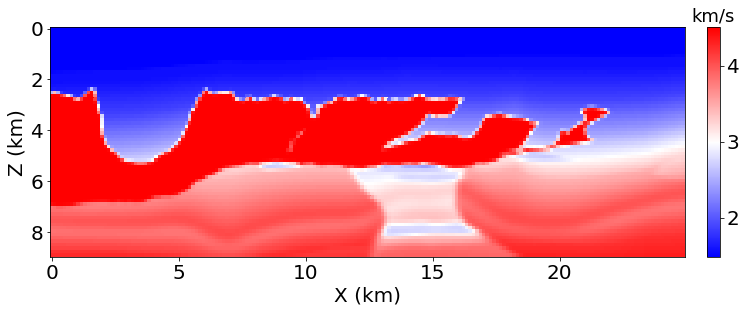

MSE = 0.0
SSIM = 1.0000000000000002
PSNR = inf


/home/users/zhuwq/.local/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10


In [74]:
plot_model(model_true_BP, "BP_model_true", fig_dir, src=False, cmap="bwr")
metrics(model_true_BP["vp"].T, model_true_BP["vp"].T)

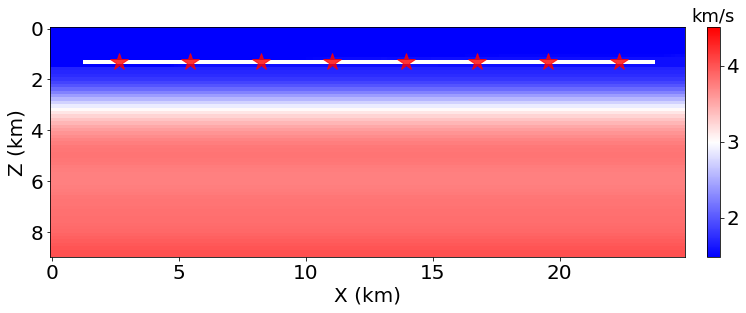

MSE = 616.2487634158849
SSIM = 0.8370136667832455
PSNR = 41.714074427161655


In [75]:
plot_model(model_smooth_BP, "BP_model_smooth", fig_dir, src=True, vmax=vmax, vmin=vmin, cmap="bwr")
metrics(model_true_BP["vp"].T, model_smooth_BP["vp"].T)

loading 500 result/FWI/BP/inv_04990.txt


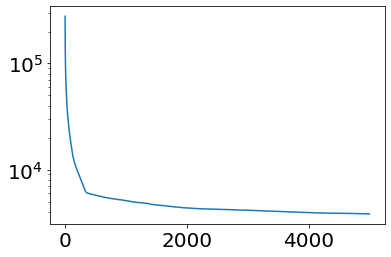

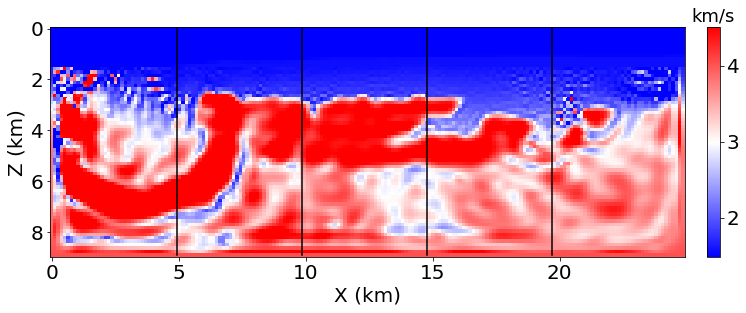

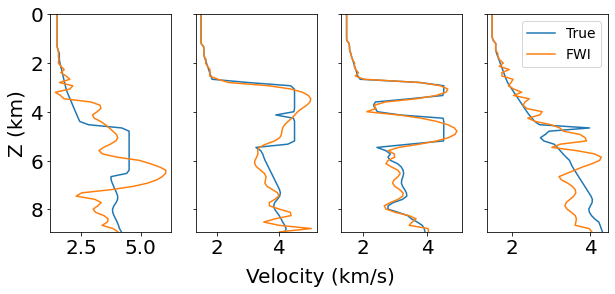

MSE = 622.4831849393125
SSIM = 0.8662328316207655
PSNR = 41.670358791498714


In [76]:
subdir = "FWI/BP"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 18 result/FWI/BP_TV/inv_00170.txt


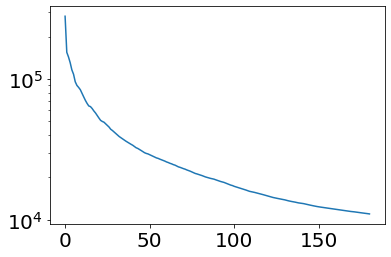

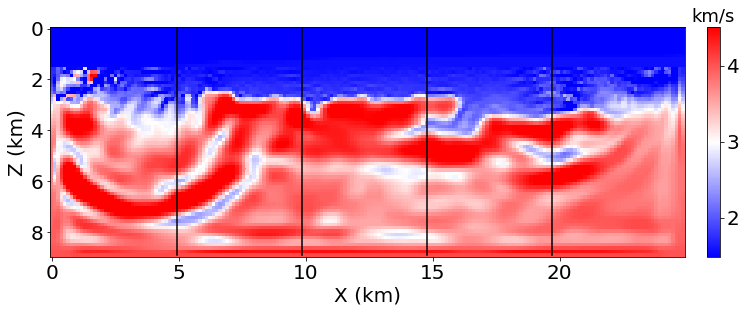

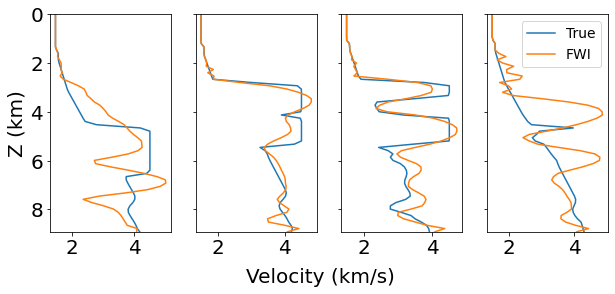

MSE = 562.8697757403365
SSIM = 0.8774348083758696
PSNR = 42.10755574435454


In [77]:
subdir = "FWI/BP_TV"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 500 result/FWI/BP_noise05/inv_04990.txt


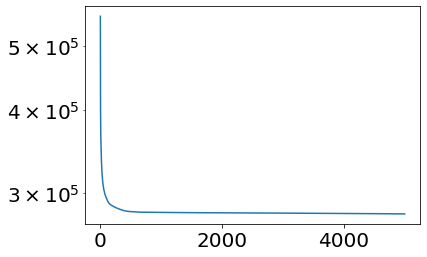

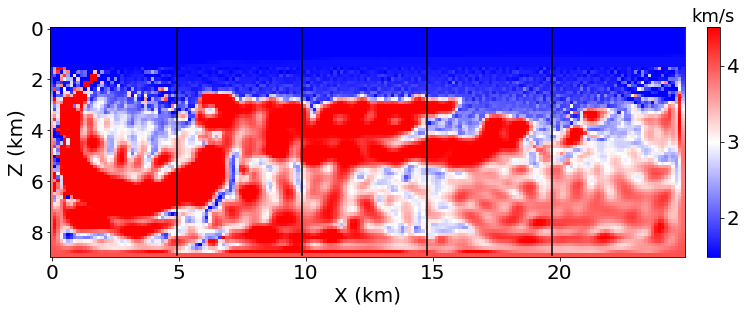

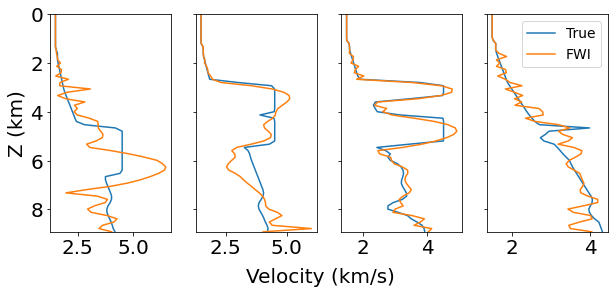

MSE = 647.53916298734
SSIM = 0.8641759245320422
PSNR = 41.49897463977071


In [86]:
subdir = "FWI/BP_noise05"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

loading 500 result/FWI/BP_noise10/inv_04990.txt


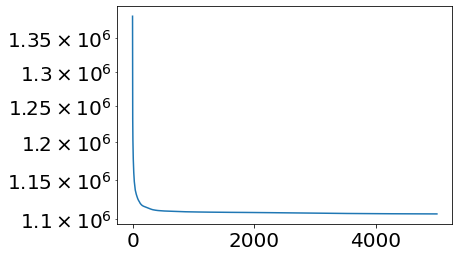

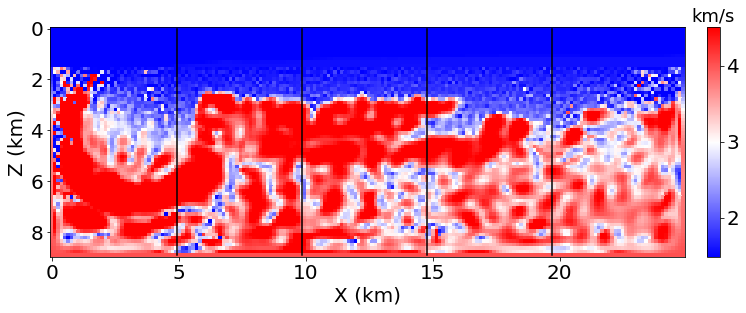

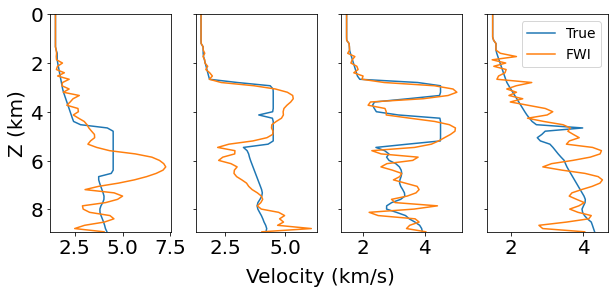

SSIM = 0.8373353841730174


0.8373353841730174

In [87]:
subdir = "FWI/BP_noise10"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
SSIM(model_true_BP["vp"].T, model_inv)

loading 500 result/FWI/BP_adam/inv_04990.txt


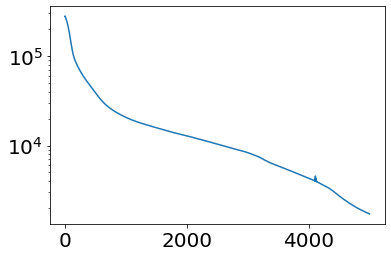

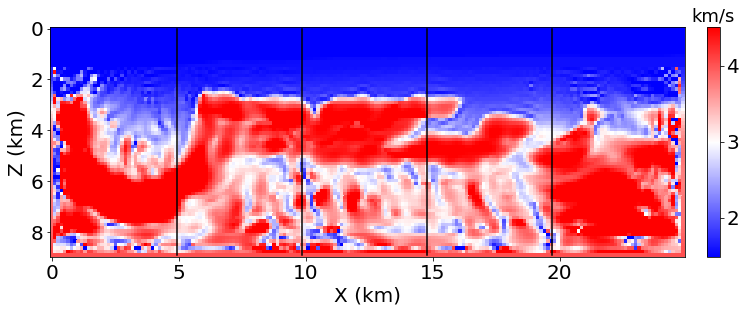

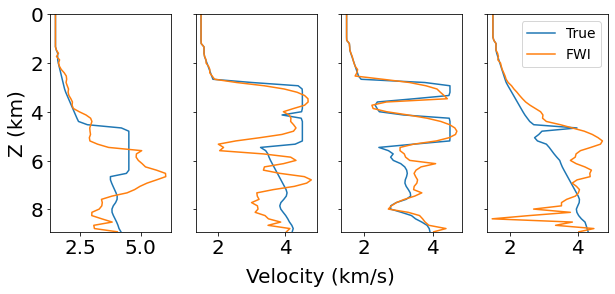

array([[1486.00024414, 1486.00024414, 1486.00024414, ..., 1486.00024414,
        1486.00024414, 1486.00024414],
       [1486.00024414, 1486.00024414, 1486.00024414, ..., 1486.00024414,
        1486.00024414, 1486.00024414],
       [1486.00024414, 1486.00024414, 1486.00024414, ..., 1486.00024414,
        1486.00024414, 1486.00024414],
       ...,
       [4010.96900378, 3036.72540542, 3053.35775722, ..., 3428.49548698,
        3380.5612189 , 4010.96900378],
       [4026.79262948, 3146.57008478, 3218.8039068 , ..., 3478.59006866,
        3489.55041612, 4026.79262948],
       [4035.2072013 , 4035.2072013 , 4035.2072013 , ..., 4035.2072013 ,
        4035.2072013 , 4035.2072013 ]])

In [88]:
subdir = "FWI/BP_adam"
plot_subdir(subdir, model_true_BP, cmap="bwr")

loading 730 result/NNFWI/BP/inv_07290.txt


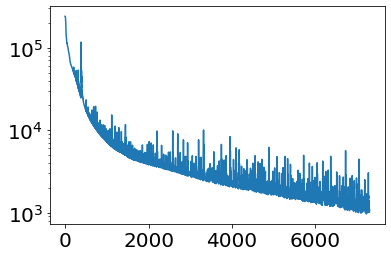

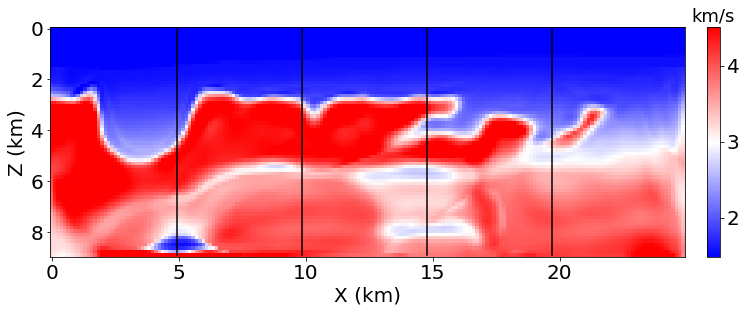

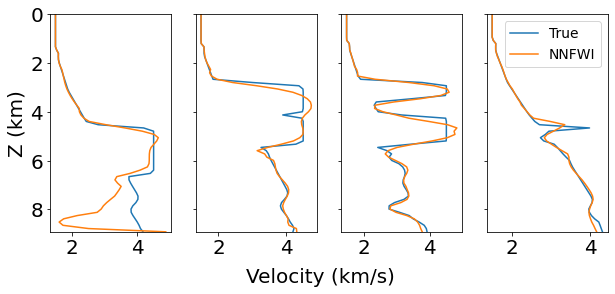

MSE = 286.4184092941706
SSIM = 0.9705317351906457
PSNR = 45.041625751003224


In [89]:
subdir = "NNFWI/BP"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

In [20]:
# subdir = "NNFWI/BP_3"
# plot_subdir(subdir, model_true_BP)

In [21]:
# subdir = "NNFWI/BP_noise05"
# plot_subdir(subdir, model_true_BP)

In [22]:
# subdir = "NNFWI/BP_noise10"
# plot_subdir(subdir, model_true_BP)

loading 192 result/NNFWI/BP_UQ/inv_01910.txt


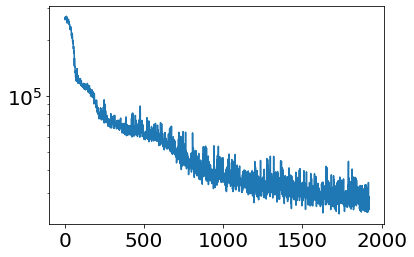

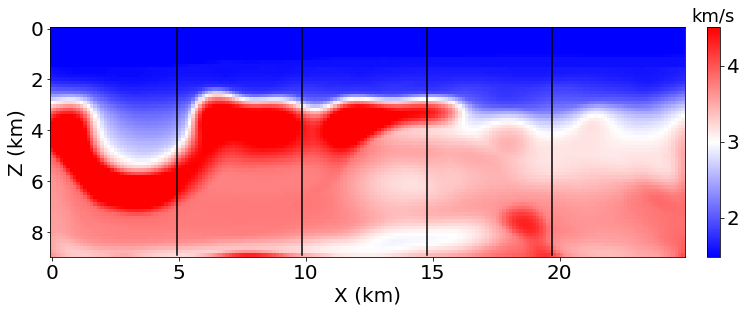

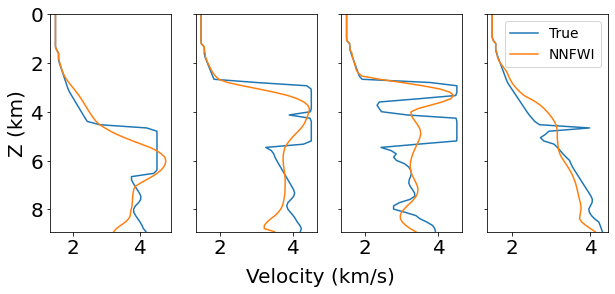

MSE = 456.22938059092223
SSIM = 0.921394921785914
PSNR = 43.019802536807745


In [84]:
subdir = "NNFWI/BP_UQ"
model_inv = plot_subdir(subdir, model_true_BP, cmap="bwr")
metrics(model_true_BP["vp"].T, model_inv)

# vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
# std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
# vp = np.loadtxt(vp)
# std = np.loadtxt(std)
# plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

In [24]:
# subdir = "NNFWI/BP_UQ_2"
# plot_subdir(subdir)

# vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
# std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
# vp = np.loadtxt(vp)
# std = np.loadtxt(std)
# plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

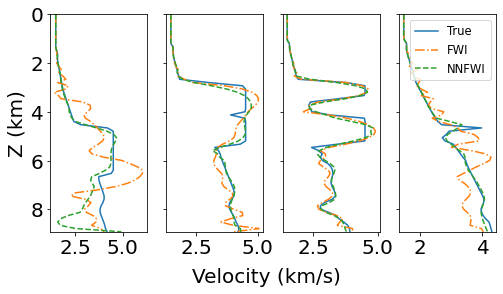

In [85]:
plot_slice(["FWI/BP", "NNFWI/BP"], model_true_BP)

In [26]:
model_true_marmousi = sio.loadmat(model_dir.joinpath("marmousi2-model-true.mat"))
model_smooth_marmousi = sio.loadmat(model_dir.joinpath("marmousi2-model-smooth.mat"))
receiver = model_true_marmousi['receiver'][0][0][0]
source = model_true_marmousi['source'][0]
vmax = np.max(model_true_marmousi['vp'])/1e3
vmin = np.min(model_true_marmousi['vp'])/1e3

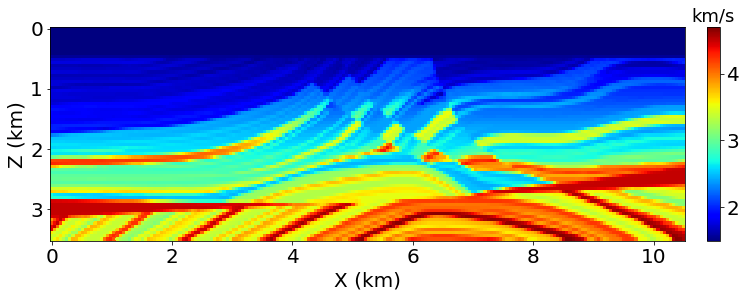

In [27]:
plot_model(model_true_marmousi, "marmousi_model_true", fig_dir)

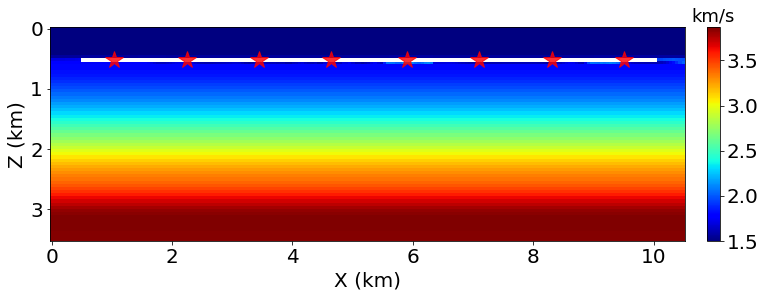

In [28]:
plot_model(model_smooth_marmousi, "marmousi_model_smooth", fig_dir, src=True)

loading 500 result/FWI/marmousi/inv_04990.txt


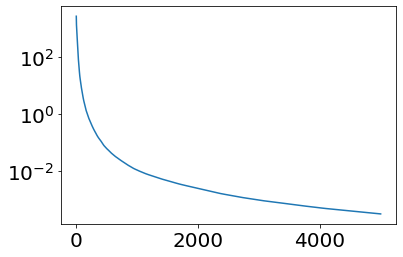

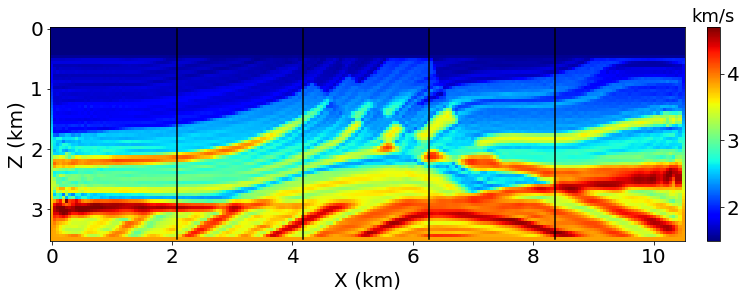

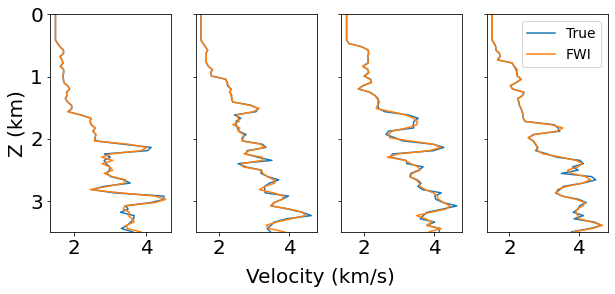

MSE = 113.77046051458039
SSIM = 0.9925487863286669
PSNR = 49.53801715418447


In [52]:
subdir = "FWI/marmousi"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 500 result/FWI/marmousi_noise10/inv_04990.txt


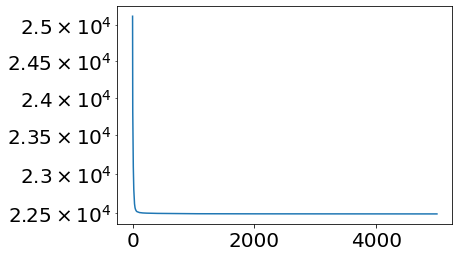

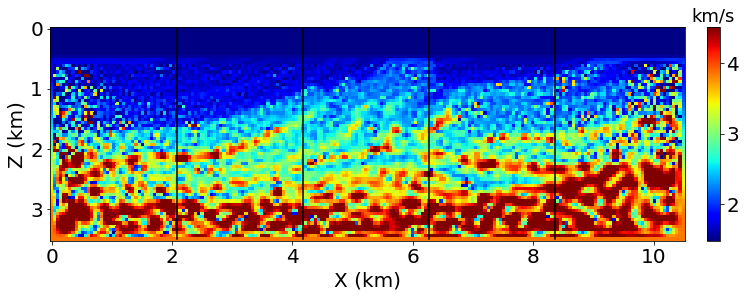

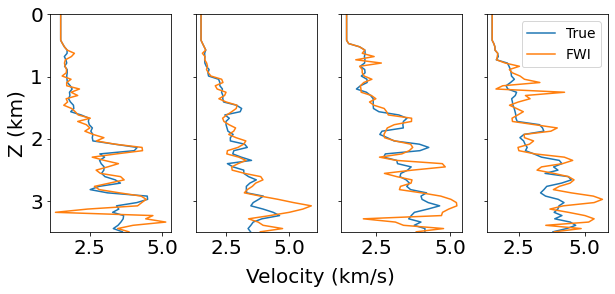

MSE = 567.7781130478014
SSIM = 0.8512880971441219
PSNR = 42.556525842805186


In [91]:
subdir = "FWI/marmousi_noise10"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 500 result/FWI/marmousi_noise05/inv_04990.txt


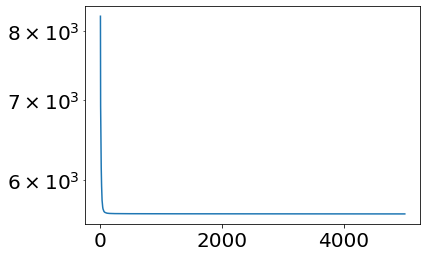

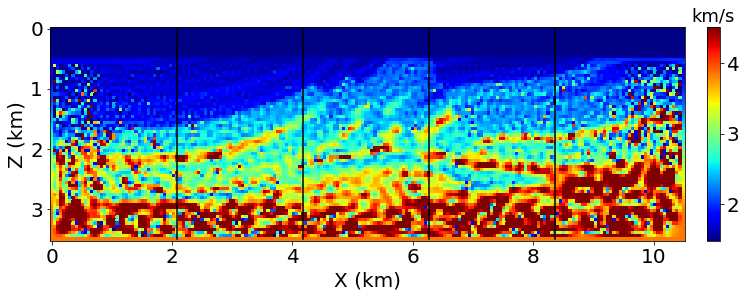

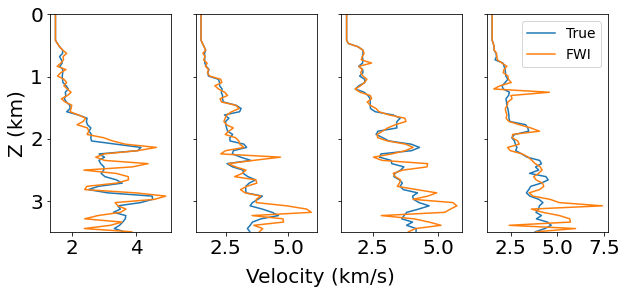

MSE = 609.5909344753937
SSIM = 0.8369520044432074
PSNR = 42.24792731650466


In [92]:
subdir = "FWI/marmousi_noise05"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 500 result/FWI/marmousi_adam/inv_04990.txt


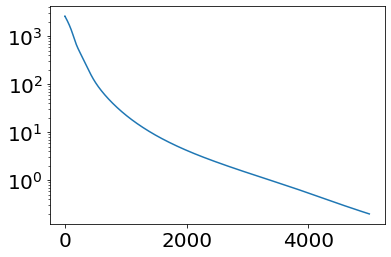

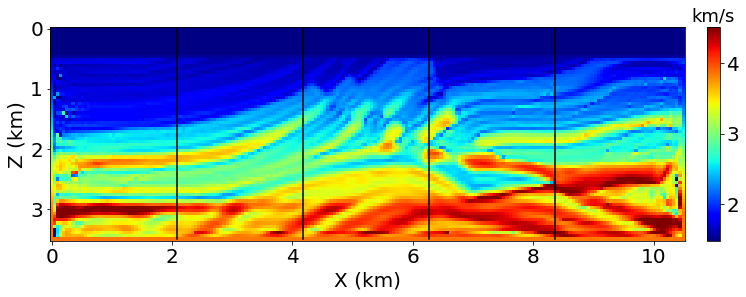

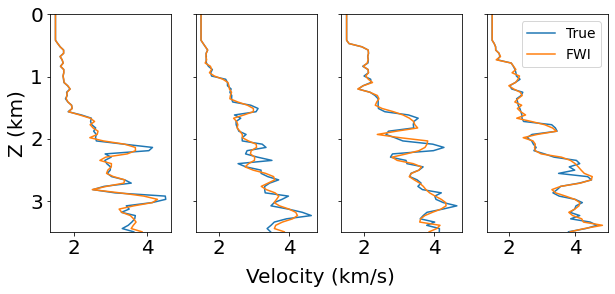

MSE = 203.85677843898173
SSIM = 0.9757921233453919
PSNR = 47.00506074676409


In [93]:
subdir = "FWI/marmousi_adam"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 554 result/NNFWI/marmousi/inv_05530.txt


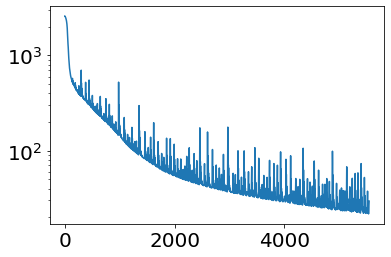

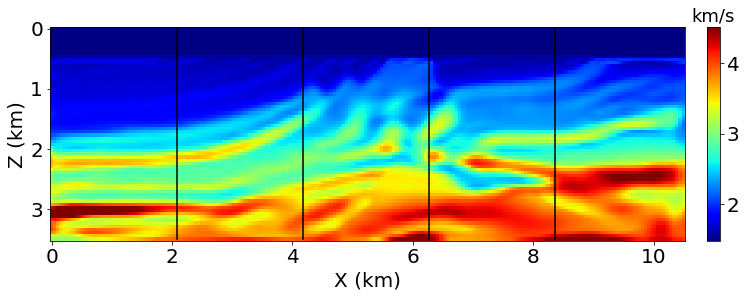

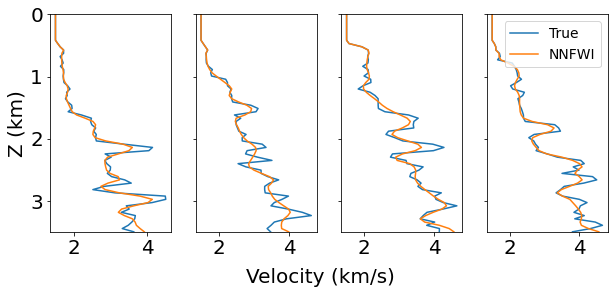

MSE = 208.76192939509724
SSIM = 0.9744621108056587
PSNR = 46.90179929436958


In [94]:
subdir = "NNFWI/marmousi"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

loading 77 result/NNFWI/marmousi_3/inv_00760.txt


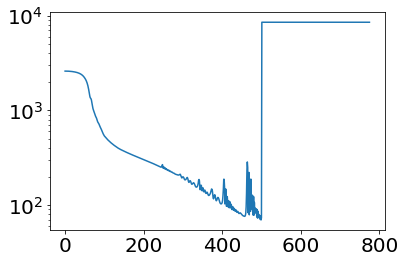

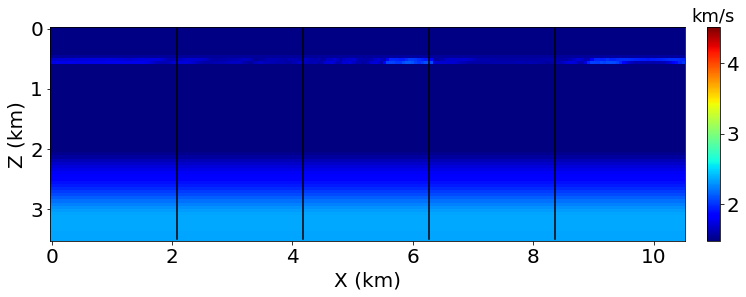

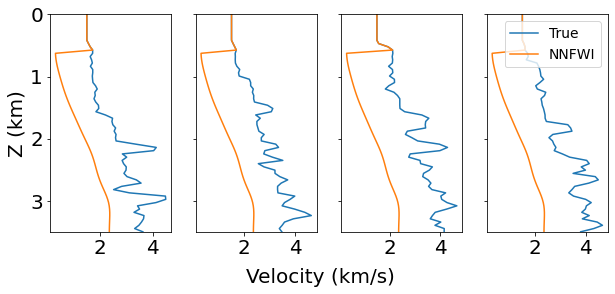

MSE = 1413.7660182981324
SSIM = 0.534506139077686
PSNR = 38.59453692805638


In [95]:
subdir = "NNFWI/marmousi_3"
model_inv = plot_subdir(subdir, model_true_marmousi)
metrics(model_true_marmousi["vp"].T, model_inv)

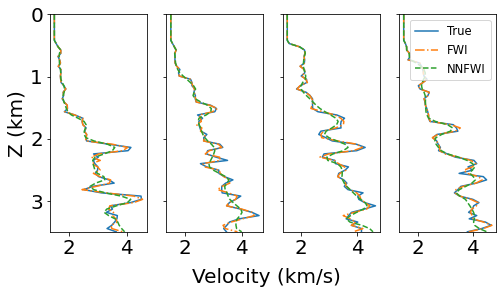

In [55]:
plot_slice(["FWI/marmousi", "NNFWI/marmousi"], model_true_marmousi)

In [36]:
# subdir = "NNFWI/marmousi_noise05"
# plot_subdir(subdir)

In [37]:
# subdir = "NNFWI/marmousi_noise10"
# plot_subdir(subdir)

In [38]:
# subdir = "NNFWI/marmousi_UQ"
# plot_subdir(subdir)

In [39]:
# subdir = "NNFWI/marmousi_UQ"
# plot_subdir(subdir)

# vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
# std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
# vp = np.loadtxt(vp)
# std = np.loadtxt(std)
# plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

In [40]:
# subdir = "NNFWI/marmousi_UQ_2"
# plot_subdir(subdir)

# vp = sorted(result_dir.joinpath(subdir).glob("inv*txt"))[-1]
# std = sorted(result_dir.joinpath(subdir).glob("std*txt"))[-1]
# vp = np.loadtxt(vp)
# std = np.loadtxt(std)
# plot_std(std, vp, model_smooth, "_".join(subdir.split("/")), fig_dir, vmax=vmax, vmin=vmin)

In [41]:
# subdir = "NNFWI/marmousi_BFGS"
# plot_subdir(subdir)

In [42]:
# subdir = "PhysGNN/marmousi"
# plot_subdir(subdir)